# Data Understanding

In [1]:
%pip install google-cloud
%pip install google-cloud-storage
%pip install google-cloud-bigquery
%pip install pandas 
from google.cloud import storage
from google.cloud import bigquery
import pandas as pd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%%bigquery
SELECT *
FROM
    `churn.data`

Downloading: 100%|██████████| 7043/7043 [00:01<00:00, 5248.15rows/s]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9732-OUYRN,Female,0,True,False,49,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),19.00,918.7,False
1,0661-KQHNK,Female,0,True,True,6,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),19.00,105.5,False
2,4709-LKHYG,Female,0,True,True,29,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Electronic check,20.00,540.05,False
3,9824-QCJPK,Male,0,True,False,36,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,666.75,False
4,4716-MRVEN,Female,0,False,False,29,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.00,599.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,5883-GTGVD,Male,0,False,False,19,True,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,True,Electronic check,99.95,1931.75,True
7039,5502-RLUYV,Female,0,True,True,69,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,103.95,7446.9,True
7040,3001-UNBTL,Male,1,True,True,29,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,103.95,2964.8,False
7041,5760-IFJOZ,Male,0,False,False,3,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,False,Mailed check,107.95,313.6,False


In [3]:
#load data from cloud storage to jupyter notebook
df = pd.read_csv('gs://churn-project/Telco-Customer-Churn.csv')

#check name of column, data type and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
%%bigquery
SELECT
    Churn,count(Churn) AS numcustomer
FROM
    `churn.data_final`
GROUP BY Churn

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.59rows/s]


,Churn,numcustomer
0,0,5163
1,1,1869


In [5]:
#see that the data type for the "TotalCharges" column is object so convert the values under the "TotalCharges" column into float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
#check data type again see that the data type for the "TotalCharges" column is float now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#check missing value after that the data type for the "TotalCharges" column is float 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

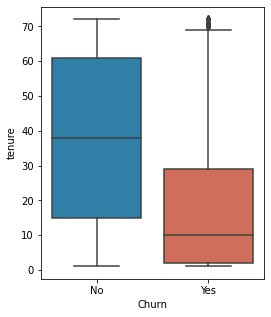

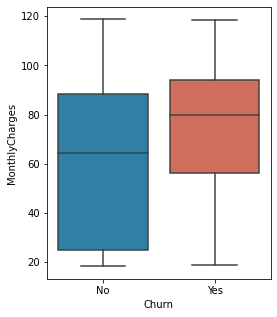

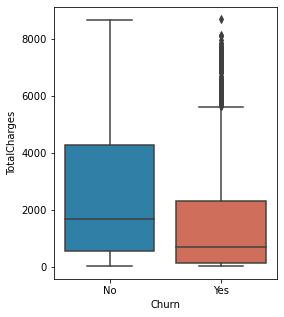

In [12]:
cols = ["#1B86BA","#E36149"]
plt.figure(figsize = (4,5))
sns.boxplot(y=df['tenure'],x=df['Churn'],palette=cols)

plt.figure(figsize = (4,5))
sns.boxplot(y=df['MonthlyCharges'],x=df['Churn'],palette=cols)

plt.figure(figsize = (4,5))
sns.boxplot(y=df['TotalCharges'],x=df['Churn'],palette=cols)

In [13]:
%%bigquery
SELECT
    tenure 
FROM
    `churn.data_final`
ORDER BY tenure DESC

Downloading: 100%|██████████| 7032/7032 [00:01<00:00, 4591.56rows/s]


,tenure
0,72
1,72
2,72
3,72
4,72
...,...
7027,1
7028,1
7029,1
7030,1


In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
feature = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

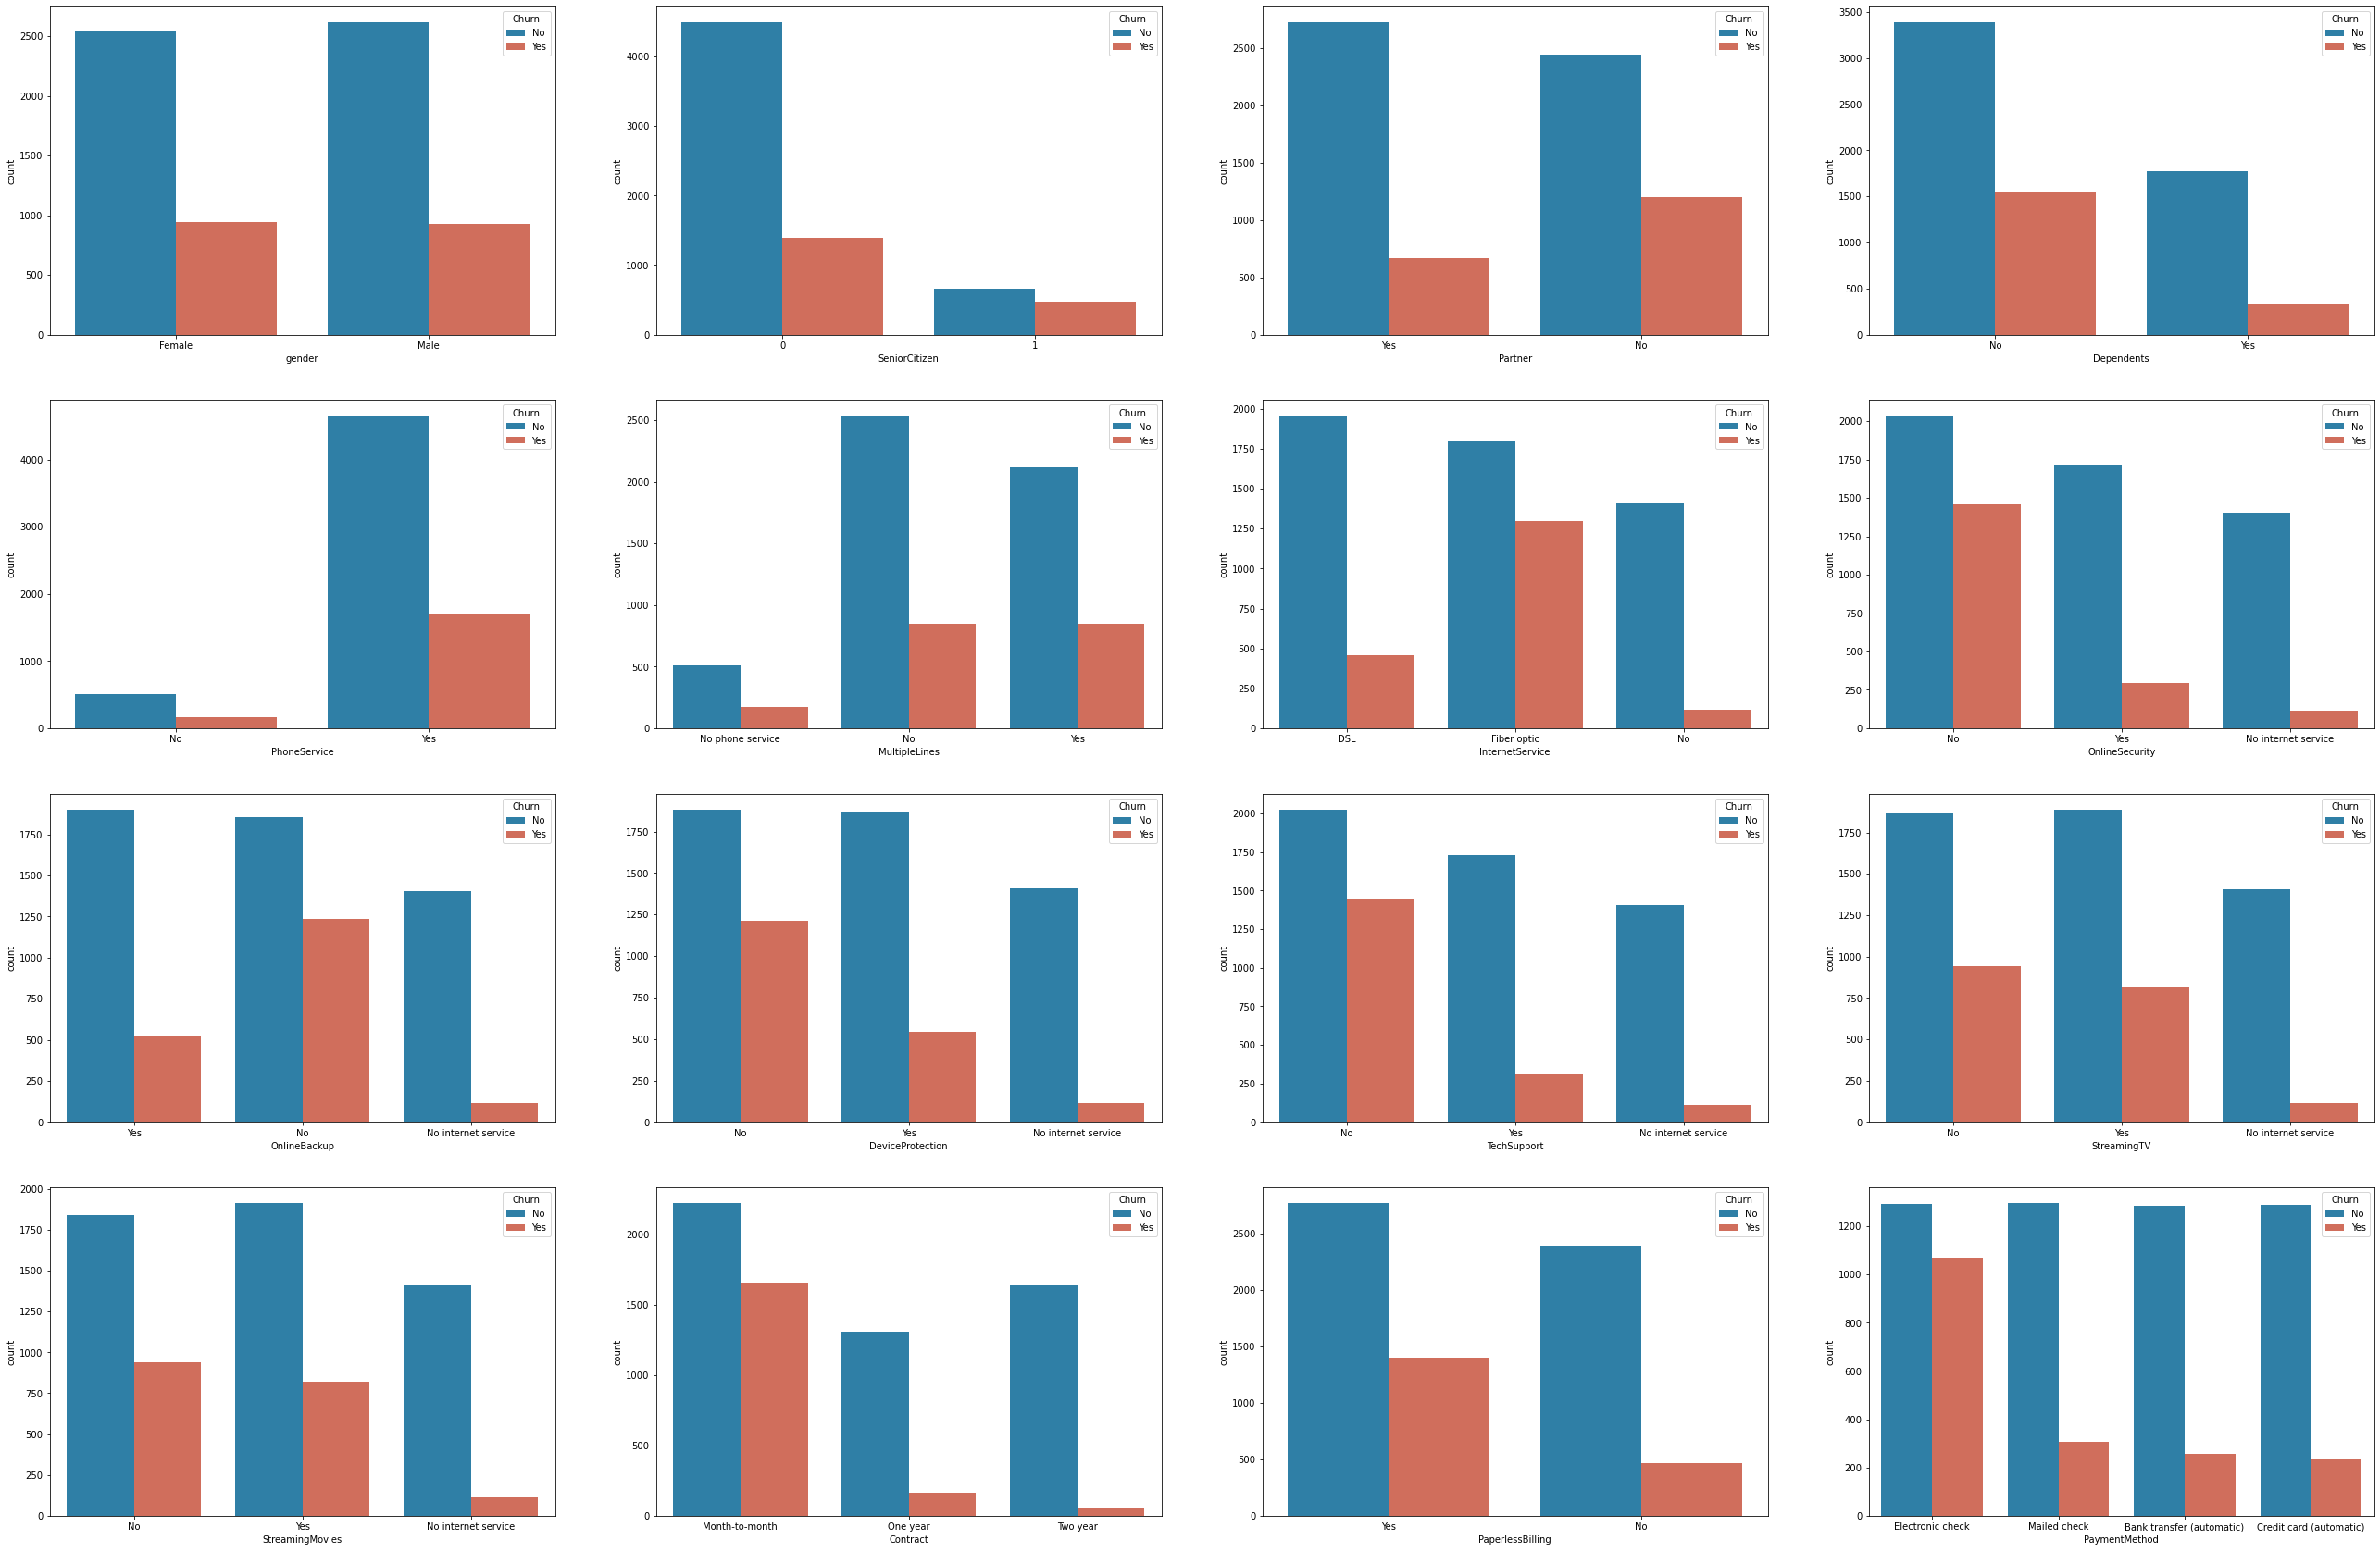

In [16]:
plt.figure(figsize = (45,30))
cols = ["#1B86BA","#E36149"]
for i in enumerate(feature):
    plt.subplot(4,4,i[0]+1)
    sns.countplot(i[1],hue = 'Churn' , data = df,palette=cols)